## The Strategy pattern

The Strategy pattern is a common demonstration of abstraction in object-oriented
programming. The pattern implements different solutions to a single problem,
each in a different object. The core class can then choose the most appropriate
implementation dynamically at runtime.

![](uml/strategy_pattern.png)

### A Strategy example
`python -m pip install pillow`

`python3 -m pip install types-Pillow`

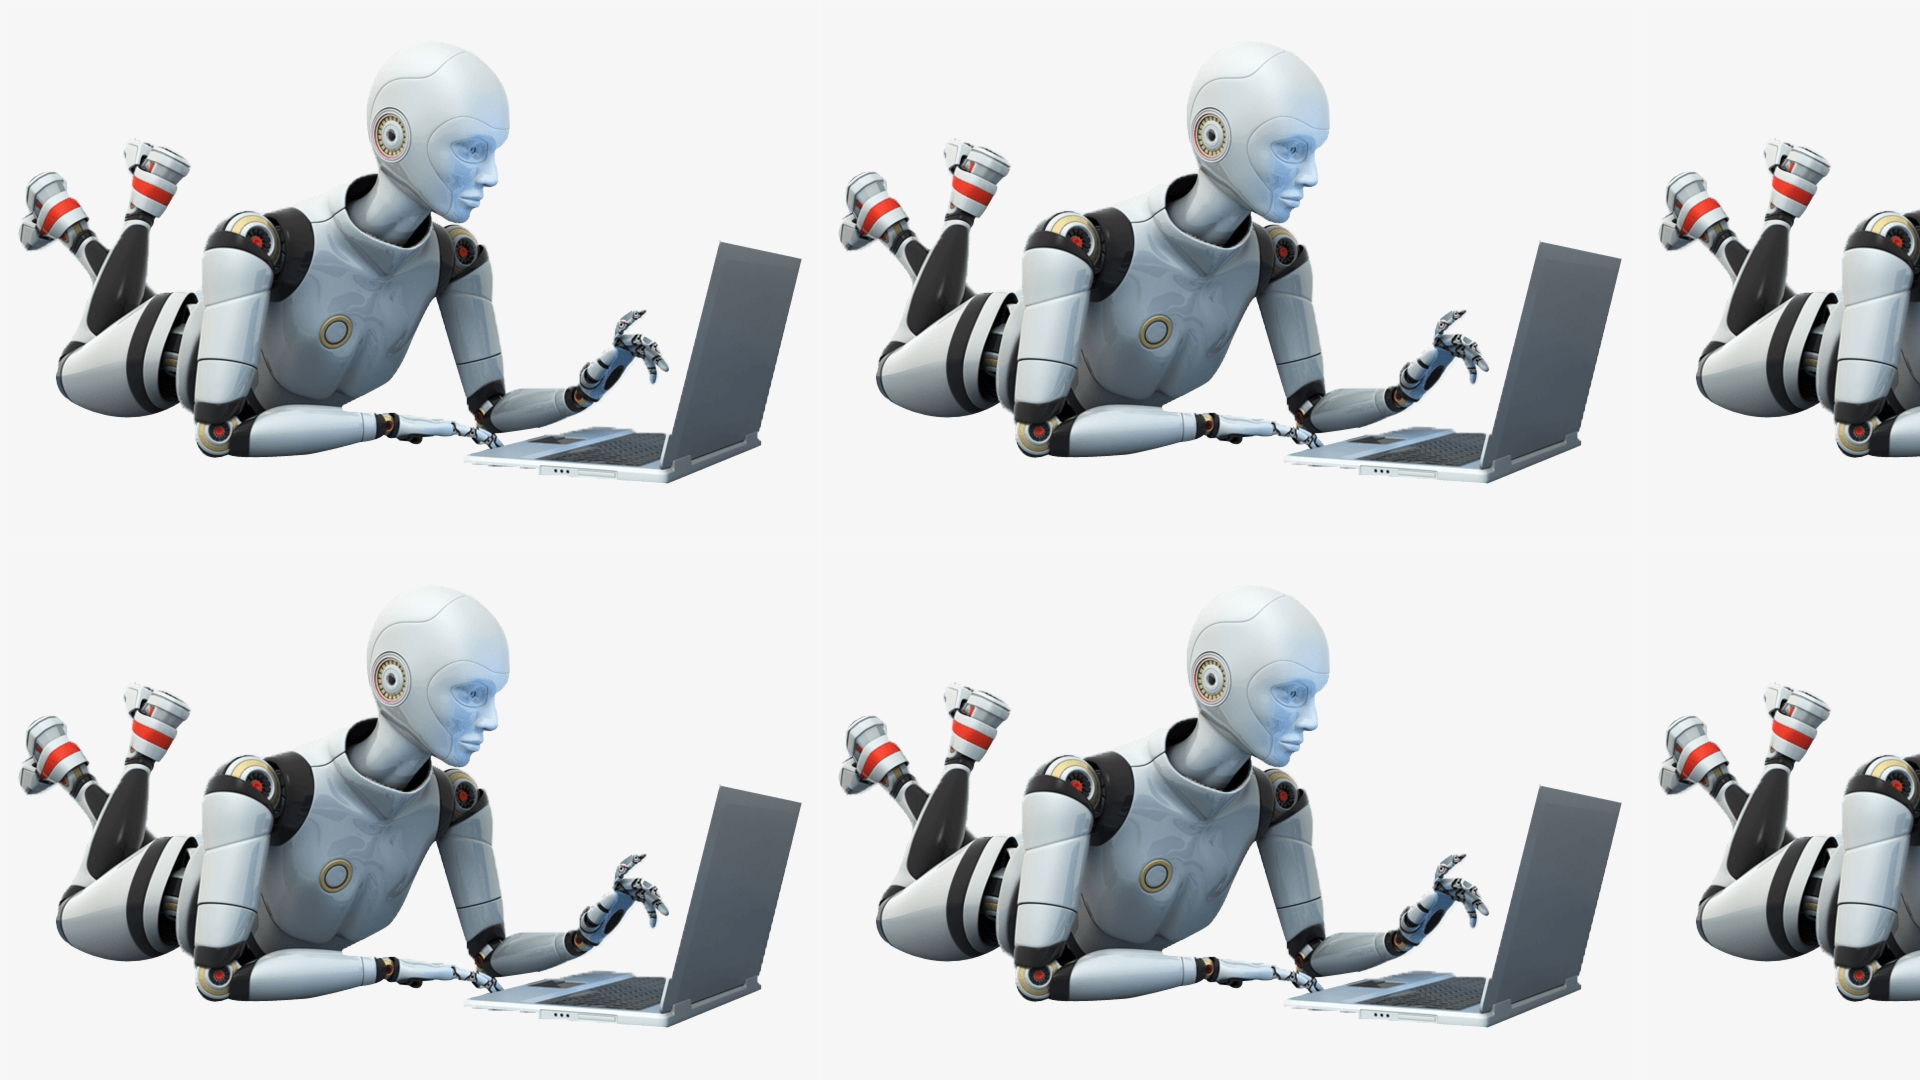

In [1]:
import abc 
from pathlib import Path  
from PIL import Image
from typing import Tuple

Size = Tuple[int, int]

class FillAlgorithm(abc.ABC):
    @abc.abstractmethod
    def make_backgorund(
        self, 
        img_file: Path, 
        desktop_size: Size,
    ) -> Image:  # type: ignore
        ...
        
        
class TiledStrategy(FillAlgorithm):
    def make_backgorund(
        self, 
        img_file: Path, 
        desktop_size: Size,
    ) -> Image:  # type: ignore
        in_img = Image.open(img_file)
        out_img = Image.new("RGB", desktop_size)
        num_tiles = [
            o // i + 1
            for o, i in zip(out_img.size, in_img.size)
        ]
        for x in range(num_tiles[0]):
            for y in range(num_tiles[1]):
                out_img.paste(
                    in_img,
                    (
                        in_img.size[0] * x,
                        in_img.size[1] * y,
                        in_img.size[0] * (x + 1),
                        in_img.size[1] * (y + 1),
                    ),
                )
        return out_img
    

class CenteredStrategy(FillAlgorithm):
    def make_backgorund(
        self, 
        img_file: Path, 
        desktop_size: Size,
    ) -> Image:  # type: ignore
        in_img = Image.open(image_file)
        out_img = Image.new("RGB", desktop_size)
        left = (out_img.size[0] - in_img.size[0]) // 2
        top = (out_img.size[1] - in_img.size[1]) // 2
        out_img.paste(
            in_img,
            (left, top, left +in_img.size[0], top + in_img.size[1]),
        )
        return out_img
    
    
class ScaledStrategy(FillAlgorithm):
    def make_backgorund(
        self, 
        img_file: Path, 
        desktop_size: Size,
    ) -> Image:  # type: ignore    
        in_img = Image.open(image_file)
        out_img = in_img.resize(desktop_size)   
        return out_img
        
    
class Resizer:
    def __init__(self, algorithm: FillAlgorithm) -> None:
        self.algorithm = algorithm
    
    def resize(self, image_file: Path, size: Size
              ) -> Image:  # type: ignore
        return self.algorithm.make_backgorund(image_file, size)
    

image_file = Path.cwd() / "uml/ai.jpeg"
desktop = Resizer(TiledStrategy())  # uncoment to see strategy
# desktop = Resizer(CenteredStrategy())  # uncoment to see strategy
# desktop = Resizer(ScaledStrategy())  # uncoment to see strategy
image = desktop.resize(image_file, (1920, 1080))
image

**Note:** 
A lot of mypy ignores added due to lack of annotations in PIL module.

In [2]:
if __name__ == '__main__':        
    import doctest
    import subprocess
    name = "04-The Strategy pattern"
    doctest.testmod(verbose=False)
    subprocess.run(f'jupyter nbconvert --to script --output test "{name}"', shell=True)
    std_out = subprocess.run('mypy --strict test.py', capture_output=True, shell=True).stdout
    print(std_out.decode('ascii'))

[NbConvertApp] Converting notebook 03-The Strategy pattern.ipynb to script
[NbConvertApp] Writing 3450 bytes to test.py


Success: no issues found in 1 source file

